# Clase 16: Outliers y Visualización en Baja Dimensionalidad

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Pablo Badilla**


## Roadmap

- [X] Preprocesamiento y Pipelines. Intro a Scikit-learn.
- [X] Manejo de Valores Faltantes.
- [ ] Detección de Outliers y Visualizaciones en Baja Dimensionalidad.
- [ ] Clustering.
- [ ] Aprendizaje Supervisado 1: Métricas de Evaluación, Entrenamiento y Prueba de Modelos.
- [ ] Aprendizaje Supervisado 2: Modelos de Clasificación y Regresión.
- [ ] Selección de atributos y reducción de Dimensionalidad. Selección de modelos usando Grid search.
- [ ] Clasificación de Texto 	
- [ ] Interpretabilidad.

## Objetivos de la Clase

- Entender qué es un outlier y explorar distintas téncicas para encontrarlos.
- Explorar técnicas para visualizar datos en baja dimensionalidad.
- Integrar los conocimientos adquiridos al pipeline.

## Detección y manejo de Anomalías

Una anomalía (*outlier* en ingles) es un dato significativamente distinto a los demás. Se puede considerar como una observación cuya desviación del conjunto de datos permite establecer la hipótesis, de que su generación fue obtenida por un mecanismo distinto al principal en la modelación de un fenómeno.

![Outlier](./resources/outliers.gif)

> **Pregunta**: ¿Por qué debería preocuparme por estos valores?

Las anomalías contienen por tanto información sobre características anormales de las entidades y esquemas que impactan el proceso generativo de los datos. Reconocer estas observaciones permite:
- Desde el punto de vista teórico, mejorar el entendimiento de los problemas modelados. 
- Desde el punto de vista práctico, permite mejorar procesos de adquisición de datos y presición de modelos.


Antes de continuar, es necesario hacer una distinción entre términos:

- **Detección de Outliers** : Detectamos anomalías sobre los datos que estamos analizando o sobre los datos de entrenamiento del modelo.

- **Novelty Detection**: Cuando detectamos outliers sobre datos nuevos.


## Tipos de Outliers

- Univariados: Solo en una característica de los datos.
- Multivariados: Outlier al combinar más de una característica de los datos.
   

## Origen de los Outliers


> **Pregunta ❓**: ¿Cuáles son las posibles fuentes de Outliers?


- Errores al transcribir los Datos.
- Errores de Medición.
- Errores Experimentales.
- Errores del preprocesamiento.
- Al extraer o mezclar datos que no son compatibles entre si.
- Naturales.

## Dataset de Hoy: Wine Quality 🍷

![](./resources/wine.jpg)

<center> Fuente de la imagen: https://www.baysidegroup.com.au/blog/could-native-grapes-be-the-future-of-australian-wine/</center>

Wine Quality es un dataset de características que describen vinos portugeses de la variedad "Vinho Verde".

Atributos:

    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    
Output: Calidad subjetiva del vino.

    12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('./resources/wineQualityReds.csv', index_col = 0)

In [2]:
df

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1               7.4             0.700         0.00             1.9      0.076   
2               7.8             0.880         0.00             2.6      0.098   
3               7.8             0.760         0.04             2.3      0.092   
4              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1595            6.2             0.600         0.08             2.0      0.090   
1596            5.9             0.550         0.10             2.2      0.062   
1597            6.3             0.510         0.13             2.3      0.076   
1598            5.9             0.645         0.12             2.0      0.075   
1599            6.0             0.310         0.47             3.6      0.067   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                    11.0                  34.0  0.99780  3.51       0.56   
2                    25.0                  67.0  0.99680  3.20       0.68   
3                    15.0                  54.0  0.99700  3.26       0.65   
4                    17.0                  60.0  0.99800  3.16       0.58   
5                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1595                 32.0                  44.0  0.99490  3.45       0.58   
1596                 39.0                  51.0  0.99512  3.52       0.76   
1597                 29.0                  40.0  0.99574  3.42       0.75   
1598                 32.0                  44.0  0.99547  3.57       0.71   
1599                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1         9.4        5  
2         9.8        5  
3         9.8        5  
4         9.8        6  
5         9.4        5  
...       ...      ...  
1595     10.5        5  
1596     11.2        6  
1597     11.0        6  
1598     10.2        5  
1599     11.0        6  

[1599 rows x 12 columns]

In [2]:
df.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

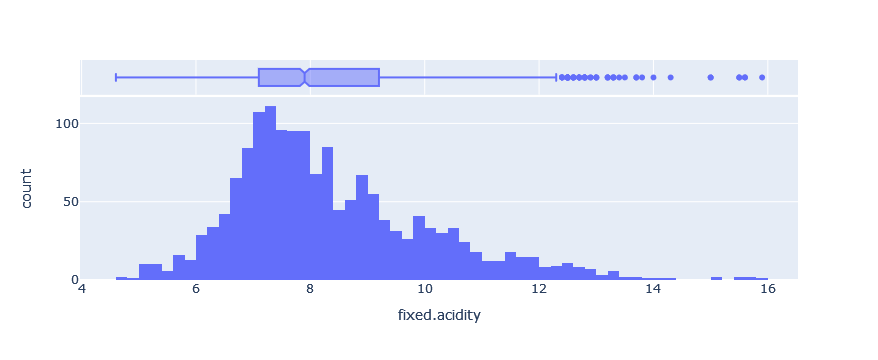

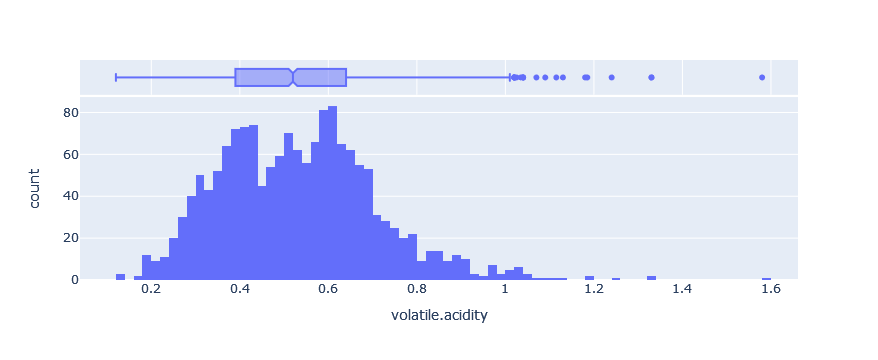

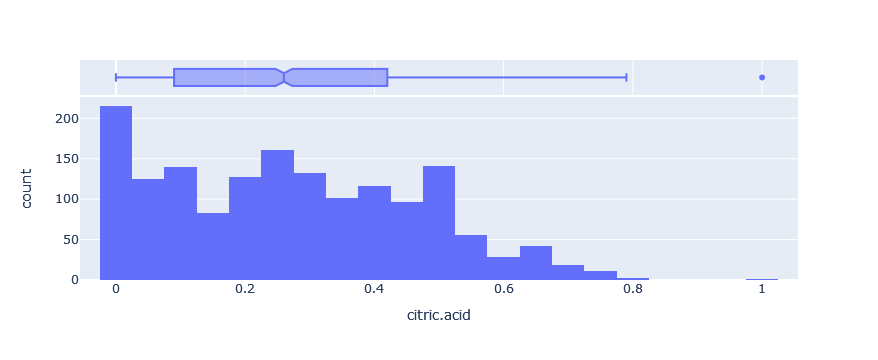

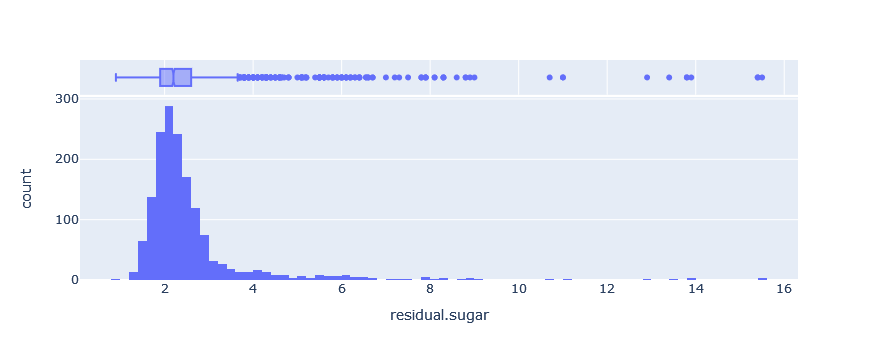

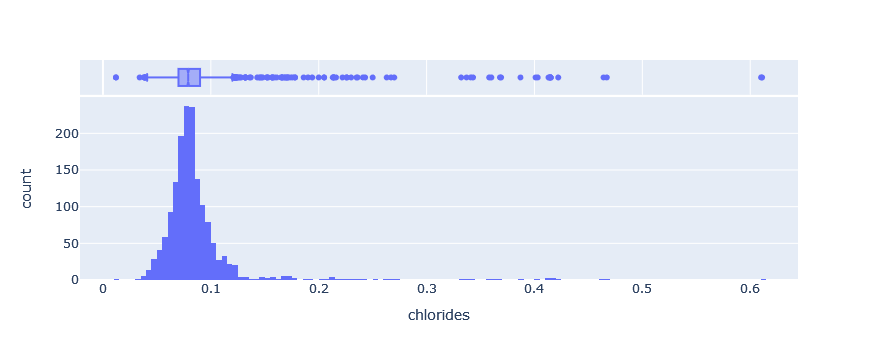

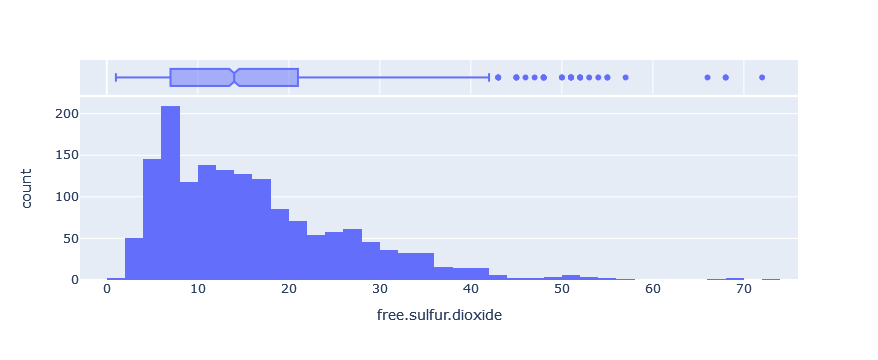

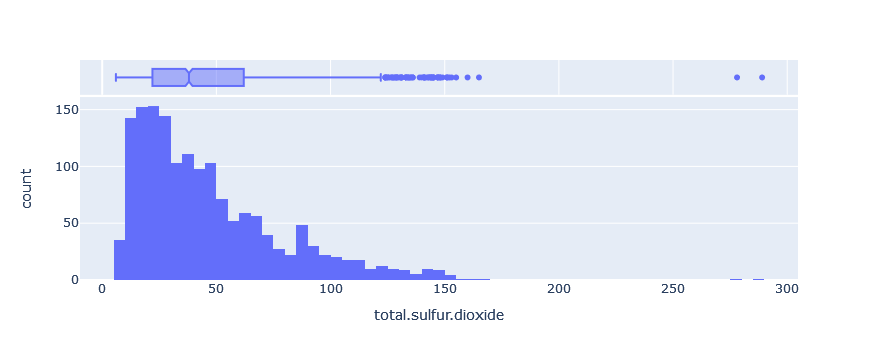

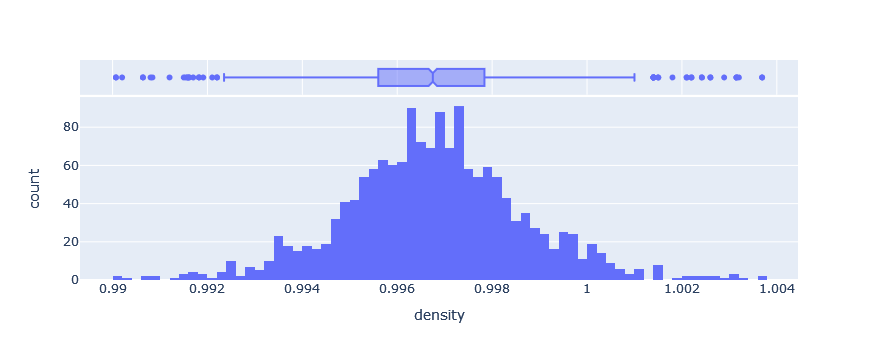

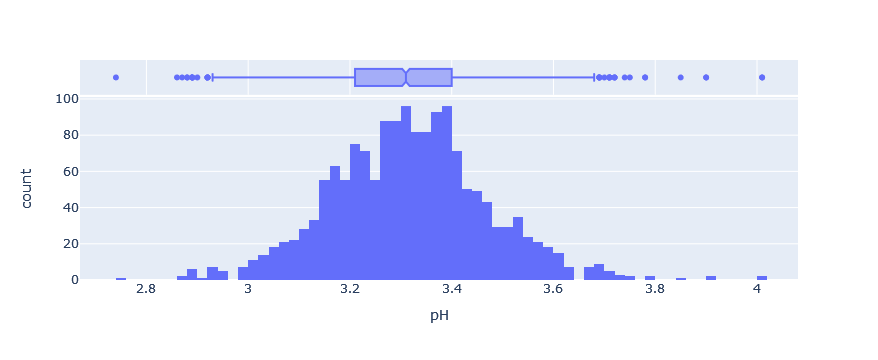

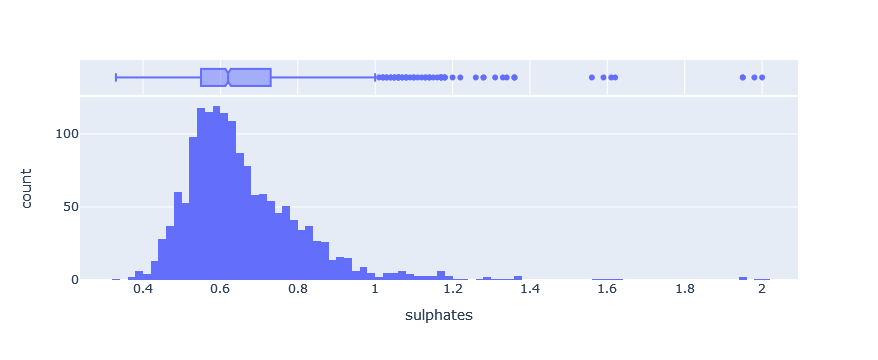

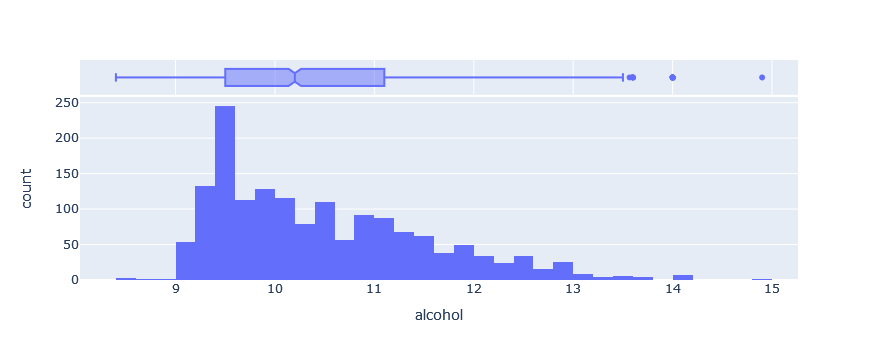

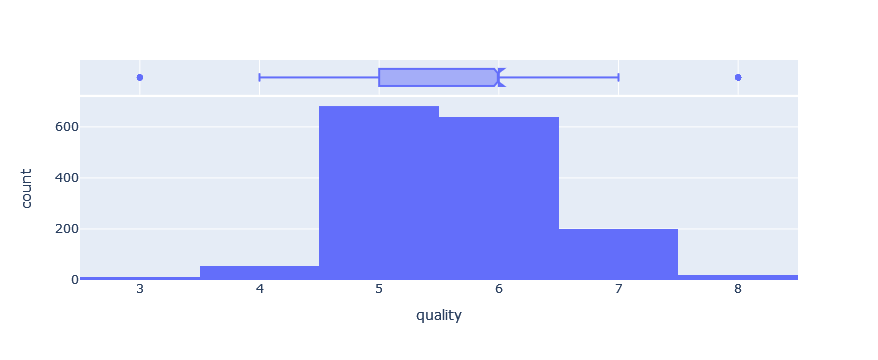

In [20]:
for col in df:
    fig = px.histogram(df, x=col, marginal='box')
    fig.show()

## Métodos de Manejo de Anomalías Univariados


#### Desviación Estándar

Si se estima que la variable a estudiar e distribuye de manera normal, entonces el 95% de los datos se encuentra a 2 desviaciones estándar de la media, mientras que el 99.7% se encuentra dentro de 3 desviaciones estándar. Basándose en esto, se puede considerar que cualquier punto fuera de 3 desviaciones estándar de la media como candidato a anomalía. Una forma más flexible de estimar anomalías usando el principio de normalidad, es por medio de z-scores. 


$$\text{z-score} = \frac{x_i - \overline{x}}{s}$$


![Distribución Normal](./resources/norm.png)

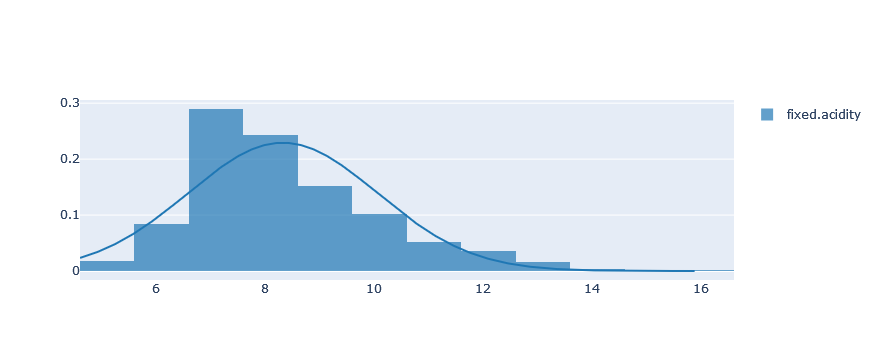

In [37]:
import plotly.figure_factory as ff

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot([df['fixed.acidity'].values], ['fixed.acidity'],
                         curve_type='normal', show_rug=False)
fig.show()

In [4]:
from scipy.stats import zscore

z_scores = zscore(df['fixed.acidity'])
z_scores

1      -0.528360
2      -0.298547
3      -0.298547
4       1.654856
5      -0.528360
          ...   
1595   -1.217796
1596   -1.390155
1597   -1.160343
1598   -1.390155
1599   -1.332702
Name: fixed.acidity, Length: 1599, dtype: float64

In [6]:
# agregamos los zscores al df
df['fixed.acidity_zscores'] = z_scores


In [8]:
# agregamos un booleano por cada fila que indica si la observación está 
# a 3 o más distribuciones estandar entonces es booleano.
df['fixed.acidity_outlier'] = df['fixed.acidity_zscores'].abs() > 3

df[['fixed.acidity', 'fixed.acidity_zscores', 'fixed.acidity_outlier']].head(10)

fixed.acidity  fixed.acidity_zscores  fixed.acidity_outlier
1             7.4              -0.528360                  False
2             7.8              -0.298547                  False
3             7.8              -0.298547                  False
4            11.2               1.654856                  False
5             7.4              -0.528360                  False
6             7.4              -0.528360                  False
7             7.9              -0.241094                  False
8             7.3              -0.585813                  False
9             7.8              -0.298547                  False
10            7.5              -0.470907                  False

In [55]:
df.loc[df['fixed.acidity_outlier'], 
   ['fixed.acidity', 'fixed.acidity_zscores', 'fixed.acidity_outlier']]

fixed.acidity  fixed.acidity_zscores  fixed.acidity_outlier
244           15.0               3.838072                   True
245           15.0               3.838072                   True
348           13.8               3.148635                   True
375           14.0               3.263541                   True
382           13.7               3.091182                   True
392           13.7               3.091182                   True
443           15.6               4.182790                   True
545           14.3               3.435900                   True
555           15.5               4.125337                   True
556           15.5               4.125337                   True
558           15.6               4.182790                   True
653           15.9               4.355149                   True

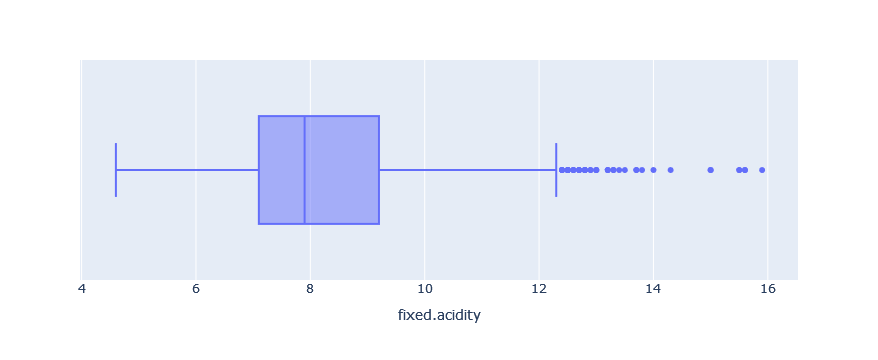

In [10]:
px.box(df, x='fixed.acidity', height=200)

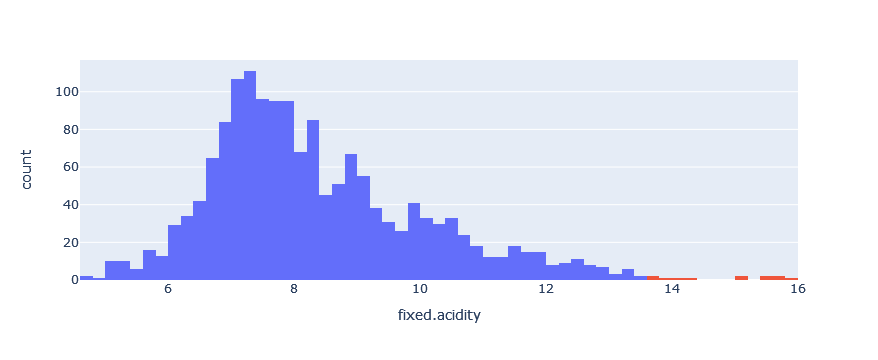

In [11]:
fig = px.histogram(df, x='fixed.acidity', color='fixed.acidity_outlier')
fig.update_layout(showlegend=False)

Si se va a estudiar una columna con ouliers mediante este método, es coveniente hacer un test de normalidad. Si la variable no cumple con la hipótesis, es posible preprocesarla usando el método de box-cox, Yeo-Johnson o Inter Quantilico. Se recomienda este último por ser robusto a outliers. 

**Obs**: para esta formulación, una anomalía es un punto *fuera de rango* si bien son definiciones similares, por lo general son distintas.

#### IQR: Rango intercuantílico

El rango intercuantílico (**IQR**) se utiliza para medir la dispersión de los datos. 
Para obtenerlo: 

Los datos se separan en 4 grupo de (casi) igual tamaño.
El IQR se calcula como la diferencia entre el primer cuartil $Q1$ (25%) y el tercero $Q3$ (75%) : $IQR = Q3 - Q1$.

![](./resources/iqr.png)

<center> Fuente: https://panmath7.files.wordpress.com/2017/04/how_to_find_iqr_boxplot_image.jpg </center>

In [57]:
df['total.sulfur.dioxide'].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total.sulfur.dioxide, dtype: float64

In [64]:
px.histogram(df, 'total.sulfur.dioxide', marginal='box')

In [12]:
desc = df['total.sulfur.dioxide'].describe()
desc

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total.sulfur.dioxide, dtype: float64

In [18]:
iqr = desc['75%'] - desc['25%']
iqr

40.0

Luego, los valores que estén en $25\% - (IQR * 1.5)$

In [19]:
cota_inf = desc['25%'] - iqr * 1.5
cota_inf

-38.0

Y los valores que estén sobre $75\% + iqr_val * 1.5$

In [20]:
cota_sup = desc['75%'] + iqr * 1.5
cota_sup

122.0

Pueden ser considerados como outliers

In [21]:
df['total.sulfur.dioxide_outlier'] = ((df['total.sulfur.dioxide'] > cota_sup)
                                      |
                                      (df['total.sulfur.dioxide'] < cota_inf))


In [22]:
import plotly.express as px


fig1 = px.box(df, x='total.sulfur.dioxide', height=200)
fig1.show()

fig2 = px.histogram(df,
                    x='total.sulfur.dioxide',
                    color='total.sulfur.dioxide_outlier', title='total.sulfur.dioxide<br><sup>Rojo = outlier</sup>')
fig2.update_layout(showlegend=False)
fig2.show()

En el gráfico de caja, vemos que los outliers están sobre y bajo las lineas rectas, cada una representa Q1 - 1.5 x IQR (linea inferior) y Q3 + 1.5 x IQR (linea superior) Los valores dentro de la caja corresponden al IQR y la linea central es la mediana de los datos.

> **Pregunta:** ¿Por qué 1.5 y no otro número?
   
![IQR 1.5](./resources/iqr_origen.png)  

## Reducción de Dimensionalidad para la Visualización 

Como hemos visto en las clases anteriores, todos las observaciones se componen de muchas variables/características distintas. Mientras más características se tengan, más complejo se torna el análisis exploratorio de datos, la detección de outliers y la creación de modelos predictivos.



In [86]:
px.scatter_matrix(df)

In [23]:
df.head(3)

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.88         0.00             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968  3.20       0.68   
3                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  fixed.acidity_zscores  fixed.acidity_outlier  \
1      9.4        5              -0.528360                  False   
2      9.8        5              -0.298547                  False   
3      9.8        5              -0.298547                  False   

   total.sulfur.dioxide_outlier  
1                         False  
2                         False  
3                         False



Por lo tanto, sería de mucha utilidad contar con mecanismos para reducir la cantidad de características. Existen 2 enfoques: 

- **Selección de Atributos Relevantes**
- **Reducción de Dimensionalidad.**

Ambos serán vistos con mayor profundidad más adelante. 

Sin embargo, existe un par de métodos de reducción de dimensionalidad que nos pueden ser particularmente útiles para la tarea que estamos resolviendo en este momento (detección de outliers) y en general, para crear una idea de como se distribuyen los datos al considerar todas las características.


Estos son los **métodos de reducción de dimensionalidad para visualización**. Estas son técnicas que nos permiten representar cada observación (un vector de alta dimensionalidad) en un vector de dos o tres dimensiones (mucho más sencillo para graficar).


**Paréntesis: Manifold learning**  


> Manifold learning, also called nonlinear dimensionality reduction, is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high.

### t-distributed Stochastic Neighbor Embedding (t-SNE)


La idea detrás de este método es proveer un método efectivo de reducción de dimensionalidad para visualizar un dataset complejo. El objetivo es conservar la mayor parte de la información en la dimensión baja a la vez que permita visualizar clusters y estructura general de los datos.

Este método conserva la localidad de las observaciones: Es decir, las observaciones similares queden en vectores cercanos y observaciones distintas en vectores lejanos. (cercanos y lejanos en función de sus distancias).


Sin embargo, el método posee un par de desventajas:

- Es computacionalmente caro. Puede tomar horas transformar más de un millon de datos.
- Es estocástico: diferentes ejecuciones entregan distintas proyecciones.
- Las relaciones entre distancias globales no se preservan correctamente.

> **Nota**: Es importante tener a la misma escala todos los datos.

![T-SNE sobre Dígitos](https://miro.medium.com/max/800/1*lKLB_1aghhnxQjMQziEyGQ.gif)

<center>Fuente de la animación: https://www.oreilly.com/content/an-illustrated-introduction-to-the-t-sne-algorithm/</center>


No veremos la implementación de este método en clases, pero pueden encontrar una muy buena referencia en el siguiente video: https://www.youtube.com/watch?v=NEaUSP4YerM

Ver también: **https://projector.tensorflow.org/**

In [26]:
features = df.drop(columns=['quality', 'fixed.acidity_zscores','fixed.acidity_outlier', 'total.sulfur.dioxide_outlier'])
quality = df.loc[:, ['quality']]

features.head(3)

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.88         0.00             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968  3.20       0.68   
3                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  
1      9.4  
2      9.8  
3      9.8

In [27]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Notar que hacemos un escalamiento previo!!
scaled_features = StandardScaler().fit_transform(features)

# Creamos una instancia de tsne
tsne = TSNE(n_components=2, random_state=42)

# Transformamos los datos
wine_features_tsne_embedded = tsne.fit_transform(scaled_features)
wine_features_tsne_embedded

array([[ 11.557814,  42.853165],
       [ 28.18802 ,  26.37887 ],
       [ 26.82395 ,  26.166252],
       ...,
       [-21.380491,  14.498686],
       [-24.15228 ,  14.745118],
       [-22.989943,  -6.762608]], dtype=float32)

In [28]:
# Noten que guardamos la transformación en df y no en features.
df['x_tsne'] = wine_features_tsne_embedded[:, 0]
df['y_tsne'] = wine_features_tsne_embedded[:, 1]

In [30]:
px.scatter(df, x='x_tsne', y='y_tsne', color='pH')

In [31]:
px.scatter(df, x='x_tsne', y='y_tsne', color='alcohol')

In [32]:
px.scatter(df, x='x_tsne', y='y_tsne', color='residual.sugar')

In [33]:
px.scatter(df, x='x_tsne', y='y_tsne', color='quality')

In [39]:
px.scatter(df, x='x_tsne', y='y_tsne', color='fixed.acidity')

In [38]:
px.scatter(df, x='x_tsne', y='y_tsne', color='fixed.acidity_outlier')

### Uniform Manifold Approximation and Projection (UMAP)

Relativamente novedoso método de reducción de dimensionalidad. Puede ser usado tanto para visualización como para reducción de dimensionalidad para modelos predictivos. 

Presenta varias mejoras que con respecto a TSNE.  

- Es más rápido y acepta una mayor cantidad de datos. 
- Conserva las distancias globales entre puntos.

In [32]:
# hay que instalarlo aparte. 
!pip install umap-learn

In [40]:
import umap

# Notar que hacemos un escalamiento previo!!
scaled_features = StandardScaler().fit_transform(features)

umap = umap.UMAP()

wine_features_umap_embedded = umap.fit_transform(scaled_features)
wine_features_umap_embedded

array([[10.751176 ,  7.7742763],
       [ 7.97709  ,  8.114098 ],
       [ 8.196482 ,  8.1434555],
       ...,
       [11.56399  ,  4.8637915],
       [11.7083435,  4.902533 ],
       [ 9.830753 ,  2.9045084]], dtype=float32)

In [41]:
# Noten que guardamos la transformación en df y no en features.
df['x_umap'] = wine_features_umap_embedded[:, 0]
df['y_umap'] = wine_features_umap_embedded[:, 1]

px.scatter(
    df,
    x='x_umap',
    y='y_umap',
    color='quality',
)

In [43]:
px.scatter(df, x='x_umap', y='y_umap', color='fixed.acidity_outlier')

In [44]:
px.scatter(df, x='x_umap', y='y_umap', color='fixed.acidity')

> **Pregunta:** ¿Son suficientes los detectores de outliers sobre sola una variable?

## Métodos de Manejo de Outliers Multivariados

### Paréntesis: Clustering


**El Clustering es la tarea de agrupar distintas observaciones según su similitud.**

Es de tipo no-supervisado (no requiere etiquetas para entrenar). En las siguientes clases, veremos en mayor profundidad este tema.

![](./resources/clustering.png)

### DBScan

DBscan es un algoritmo de clustering basado en densidad. Su funcionamiento se basa en clasificar los datos en tres categorías:

- Core point: Es un punto que contiene un número minimo de vecinos cerca de un vecindario (esfera de radio ɛ)

- Border point: Es un punto que no es core, pero que es alcanzable por un Core Point. Es decir, existe un camino entre el Core Point y este.

- Outlier: Es un punto que no es core point y a la vez, que no tiene un camino entre un Core Point u Border Point.

![DBSCAN](./resources/dbscan.png)

In [45]:
from sklearn.cluster import DBSCAN

# El parámetro eps indicará el tamaño de la esfera y por tanto, la cantidad de outliers
# Mientras menor sea el tamaño de eps, mayor la cantidad de outliers
clustering = DBSCAN(eps=3, min_samples=2).fit(scaled_features)

db_scan_labels = clustering.labels_

db_scan_labels

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
db_scan_labels.max()

8

In [47]:
# Nota: Los labels de los outliers son -1
df[db_scan_labels == -1]

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
152             9.2              0.52         1.00             3.4      0.610   
259             7.7              0.41         0.76             1.8      0.611   
481            10.6              0.28         0.39            15.5      0.069   
653            15.9              0.36         0.65             7.5      0.096   
724             7.1              0.31         0.30             2.2      0.053   
1115            5.0              0.40         0.50             4.3      0.046   
1236            6.0              0.33         0.32            12.9      0.054   
1245            5.9              0.29         0.25            13.4      0.067   
1575            5.6              0.31         0.78            13.9      0.074   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
152                  32.0                  69.0  0.99960  2.74       2.00   
259                   8.0                  45.0  0.99680  3.06       1.26   
481                   6.0                  23.0  1.00260  3.12       0.66   
653                  22.0                  71.0  0.99760  2.98       0.84   
724                  36.0                 127.0  0.99650  2.94       1.62   
1115                 29.0                  80.0  0.99020  3.49       0.66   
1236                  6.0                 113.0  0.99572  3.30       0.56   
1245                 72.0                 160.0  0.99721  3.33       0.54   
1575                 23.0                  92.0  0.99677  3.39       0.48   

      alcohol  quality  fixed.acidity_zscores  fixed.acidity_outlier  \
152       9.4        4               0.505795                  False   
259       9.4        5              -0.356000                  False   
481       9.2        5               1.310138                  False   
653      14.9        5               4.355149                   True   
724       9.5        5              -0.700719                  False   
1115     13.6        6              -1.907233                  False   
1236     11.5        4              -1.332702                  False   
1245     10.3        6              -1.390155                  False   
1575     10.5        6              -1.562514                  False   

      total.sulfur.dioxide_outlier     x_tsne     y_tsne     x_umap    y_umap  
152                          False  33.791080 -52.093922   3.268236  2.205547  
259                          False  32.213814 -52.355873   3.228858  2.161262  
481                          False  46.216831 -22.059248   9.184848 -1.721475  
653                          False -20.556520 -54.102089   7.050558 -0.532487  
724                           True  25.361979 -29.250679   5.840686  3.372246  
1115                         False -48.786247  26.371067  13.681401  3.555479  
1236                         False  41.869621 -23.136066   9.304231 -1.664990  
1245                          True  44.150139 -17.256596   9.210053 -1.828052  
1575                         False  42.245483 -23.173256   9.248412 -1.732607

In [48]:
# Es más sencillo visualizar los outliers con color=db_scan_labels == -1
px.scatter(df, x='x_umap', y='y_umap', color=db_scan_labels == -1)

In [50]:
px.scatter(df, x='x_umap', y='y_umap', color=db_scan_labels)

In [49]:
px.scatter(df, x='x_tsne', y='y_tsne', color=db_scan_labels == -1)

In [51]:
px.scatter(df, x='x_tsne', y='y_tsne', color=db_scan_labels)

## Métodos Específicos Provistos por Scikit-Learn

![Métodos provistos por Scikit-learn](./resources/outlier_methods_sklearn.png)

### Isolation Forest

![Isolation Tree](https://upload.wikimedia.org/wikipedia/commons/b/b9/Anomalous_Web_Traffic.png)

<center>Trafico web a través del tiempo<center/>
    
![](./resources/itree.png)
    
<center>Fuente:https://betterprogramming.pub/anomaly-detection-with-isolation-forest-e41f1f55cc6</center>

In [53]:
from sklearn.ensemble import IsolationForest
import numpy as np

isf = IsolationForest(n_estimators=20)
outliers = isf.fit_predict(scaled_features)

In [54]:
px.scatter(df, x='x_umap', y='y_umap', color=outliers)

In [55]:
px.scatter(df, x='x_tsne', y='y_tsne', color=outliers)

#### Novelty Detection

A través de `predict`, podemos decidir si un nuevo dato es outlier o no.

In [118]:
row = scaled_features[10,:].copy()
row

array([-0.93053092,  0.29149948, -0.98066858, -0.5241662 ,  0.20262147,
       -0.08366945,  0.56354529, -0.44875156, -0.20159105, -0.69723268,
       -1.1479806 , -0.93053092, -0.08695652, -0.18873728])

In [119]:
isf.predict([row])

array([1])

In [120]:
row[0] *= -1000
row[10] *= 999
row

array([ 9.30530923e+02,  2.91499483e-01, -9.80668581e-01, -5.24166200e-01,
        2.02621474e-01, -8.36694460e-02,  5.63545293e-01, -4.48751558e-01,
       -2.01591048e-01, -6.97232676e-01, -1.14683262e+03, -9.30530923e-01,
       -8.69565217e-02, -1.88737282e-01])

In [121]:
isf.predict([row])

array([1])

> **Pregunta:** ¿Podemos añadir un detector de outliers un a un pipeline?


## Custom Transformer

Recurso útil: https://stackoverflow.com/questions/52346725/can-i-add-outlier-detection-and-removal-to-scikit-learn-pipeline

In [122]:
from sklearn.pipeline import Pipeline, TransformerMixin
from sklearn.neighbors import LocalOutlierFactor

class OutlierExtractor(TransformerMixin):
    def __init__(self, **kwargs):
        """
        Create a transformer to remove outliers. A threshold is set for selection
        criteria, and further arguments are passed to the LocalOutlierFactor class

        Keyword Args:
            neg_conf_val (float): The threshold for excluding samples with a lower
               negative outlier factor.

        Returns:
            object: to be used as a transformer method as part of Pipeline()
        """

        self.threshold = kwargs.pop('neg_conf_val', -10.0)

        self.kwargs = kwargs

    def transform(self, X, y):
        """
        Uses LocalOutlierFactor class to subselect data based on some threshold

        Returns:
            ndarray: subsampled data

        Notes:
            X should be of shape (n_samples, n_features)
        """
        X = np.asarray(X)
        y = np.asarray(y)
        lcf = LocalOutlierFactor(**self.kwargs)
        lcf.fit(X)
        return (X[lcf.negative_outlier_factor_ > self.threshold, :],
                y[lcf.negative_outlier_factor_ > self.threshold])

    def fit(self, *args, **kwargs):
        return self

In [123]:
transformed_data = OutlierExtractor().transform(scaled_features, quality)